In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("barley_refined.csv")

In [3]:
df.head()

,Marketing_Year,Beginning_Stocks,Production,Imports,Total_Supply,Food_Alcohol_Industrial,Seed_Use,Feed_Residual,Total_Domestic_Use,Exports,Total_Use,Ending_Stocks
0,1975/76,92.000,379.162,12.600,483.762,130.5,15.7,186.402,332.602,22.801,355.403,128.359
1,1976/77,128.359,383.007,8.608,519.974,136.9,18.2,173.679,328.779,64.788,393.567,126.407
2,1977/78,126.407,427.784,6.443,560.634,138.6,16.8,176.678,332.078,55.497,387.575,173.059
3,1978/79,173.059,454.759,6.713,634.531,153.6,13.6,214.639,381.839,24.649,406.488,228.043
4,1979/80,228.043,383.201,7.166,618.410,157.8,13.9,201.759,373.459,52.820,426.279,192.131


In [4]:
df.tail()

,Marketing_Year,Beginning_Stocks,Production,Imports,Total_Supply,Food_Alcohol_Industrial,Seed_Use,Feed_Residual,Total_Domestic_Use,Exports,Total_Use,Ending_Stocks
46,2021/22,71.418,120.593,14.700,206.711,127.999,4.905,29.304,162.208,7.346,169.554,37.157
47,2022/23,37.157,173.920,23.449,234.526,126.448,5.210,34.920,166.578,2.128,168.706,65.820
48,2023/24,65.820,186.127,13.298,265.245,121.743,4.003,56.310,182.056,4.991,187.047,78.198
49,2024/25,78.198,144.442,8.992,231.632,114.089,3.874,35.606,153.569,8.605,162.174,69.458
50,2025/26,69.458,140.849,9.000,219.307,110.700,4.300,25.000,140.000,9.000,149.000,70.307


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Marketing_Year           51 non-null     object 
 1   Beginning_Stocks         51 non-null     float64
 2   Production               51 non-null     float64
 3   Imports                  51 non-null     float64
 4   Total_Supply             51 non-null     float64
 5   Food_Alcohol_Industrial  51 non-null     float64
 6   Seed_Use                 51 non-null     float64
 7   Feed_Residual            51 non-null     float64
 8   Total_Domestic_Use       51 non-null     float64
 9   Exports                  51 non-null     float64
 10  Total_Use                51 non-null     float64
 11  Ending_Stocks            51 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.9+ KB


In [6]:
# If you stratify on Marketing_Year, you will:

# Mix past & future in train/test
# Leak future information
# Get unrealistically good scores 🤡
# Build a model that fails in real life

In [9]:
df["Year"]=df["Marketing_Year"].str[:4].astype(int)
df.drop("Marketing_Year" , axis=1 , inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beginning_Stocks         51 non-null     float64
 1   Production               51 non-null     float64
 2   Imports                  51 non-null     float64
 3   Total_Supply             51 non-null     float64
 4   Food_Alcohol_Industrial  51 non-null     float64
 5   Seed_Use                 51 non-null     float64
 6   Feed_Residual            51 non-null     float64
 7   Total_Domestic_Use       51 non-null     float64
 8   Exports                  51 non-null     float64
 9   Total_Use                51 non-null     float64
 10  Ending_Stocks            51 non-null     float64
 11  Year                     51 non-null     int64  
dtypes: float64(11), int64(1)
memory usage: 4.9 KB


In [11]:
train_set=df.iloc[:-10]
test_set=df.iloc[-10: ] 

In [13]:
train_set.to_csv("Training_Set.csv" , index=False )

array([[<Axes: title={'center': 'Beginning_Stocks'}>,
        <Axes: title={'center': 'Production'}>,
        <Axes: title={'center': 'Imports'}>],
       [<Axes: title={'center': 'Total_Supply'}>,
        <Axes: title={'center': 'Food_Alcohol_Industrial'}>,
        <Axes: title={'center': 'Seed_Use'}>],
       [<Axes: title={'center': 'Feed_Residual'}>,
        <Axes: title={'center': 'Total_Domestic_Use'}>,
        <Axes: title={'center': 'Exports'}>],
       [<Axes: title={'center': 'Total_Use'}>,
        <Axes: title={'center': 'Ending_Stocks'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

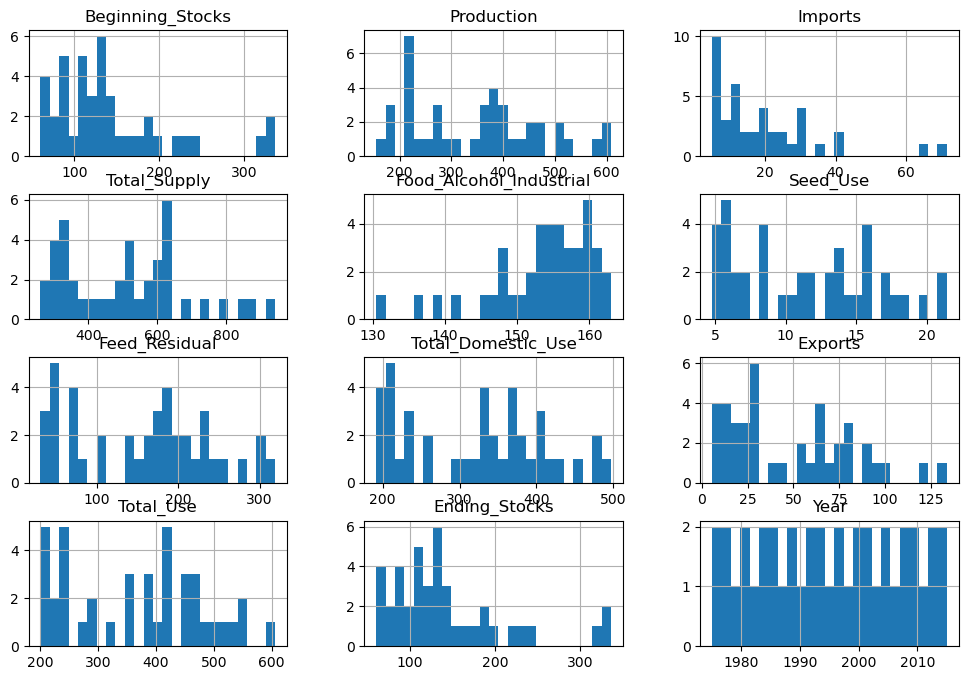

In [14]:
train_set.hist(bins=25, figsize=(12,8))
